In [1]:
import os
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def unpickle(fileName):
    
    with open(fileName, 'rb') as fs:
        
        data = pickle.load(fs, encoding = 'bytes')
        
    return data

def loadCifar10():
    
    pack = unpickle('data/cifar-10/test_batch')
    x, y = pack[b'data'], pack[b'labels']
        
    return {'img' : x, 'class' : y}

def loadCifar100():

    pack = unpickle('data/cifar-100/test')
    x, y1, y2 = pack[b'data'], pack[b'fine_labels'], pack[b'coarse_labels']

    return {'img' : x, 'class' : y1, 'super_class' : y2}

class10 = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
meta100 = unpickle('data/cifar-100/meta')
class100 = [s.decode('UTF-8') for s in meta100[b'fine_label_names']]
super_class100 = [s.decode('UTF-8') for s in meta100[b'coarse_label_names']]

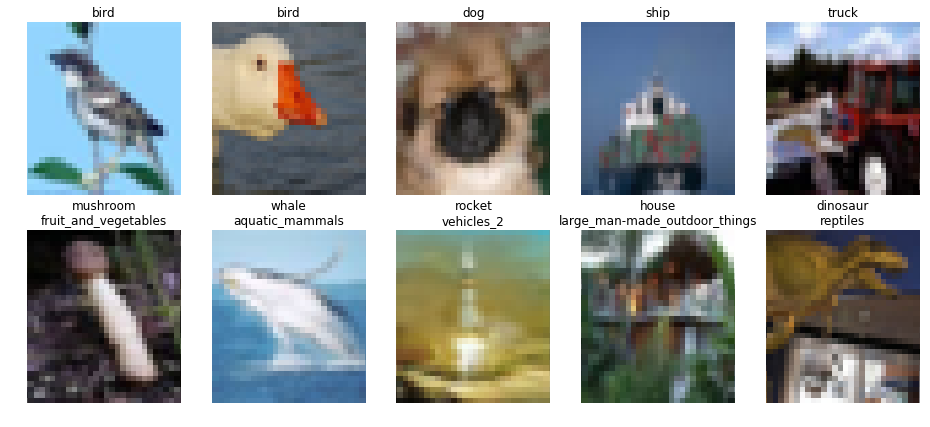

In [2]:
cifar10 = loadCifar10()
cifar100 = loadCifar100()

idx = np.random.randint(0, 10000, 5)
fig, axes = plt.subplots(2, 5, figsize = (16, 7), sharey = True)

for i in range(0, 5):
    
    axes[0][i].set_title(class10[cifar10['class'][idx[i]]])
    axes[1][i].set_title(class100[cifar100['class'][idx[i]]] + '\n' + super_class100[cifar100['super_class'][idx[i]]])
    axes[0][i].imshow(cifar10['img'][idx[i]].reshape(3, 32, 32).transpose(1, 2, 0))
    axes[1][i].imshow(cifar100['img'][idx[i]].reshape(3, 32, 32).transpose(1, 2, 0))
    axes[0][i].axis('off')
    axes[1][i].axis('off')
    
plt.show()

In [3]:
target_idx = np.random.randint(0, 10000)
target_img10 = cifar10['img'][target_idx]
target_img100 = cifar100['img'][target_idx]

L1_Cifar10 = np.array([np.linalg.norm(target_img10 - img, ord = 1) for img in cifar10['img']])
L2_Cifar10 = np.array([np.linalg.norm(target_img10 - img, ord = 2) for img in cifar10['img']])
L1_Cifar100 = np.array([np.linalg.norm(target_img100 - img, ord = 1) for img in cifar100['img']])
L2_Cifar100 = np.array([np.linalg.norm(target_img100 - img, ord = 2) for img in cifar100['img']])

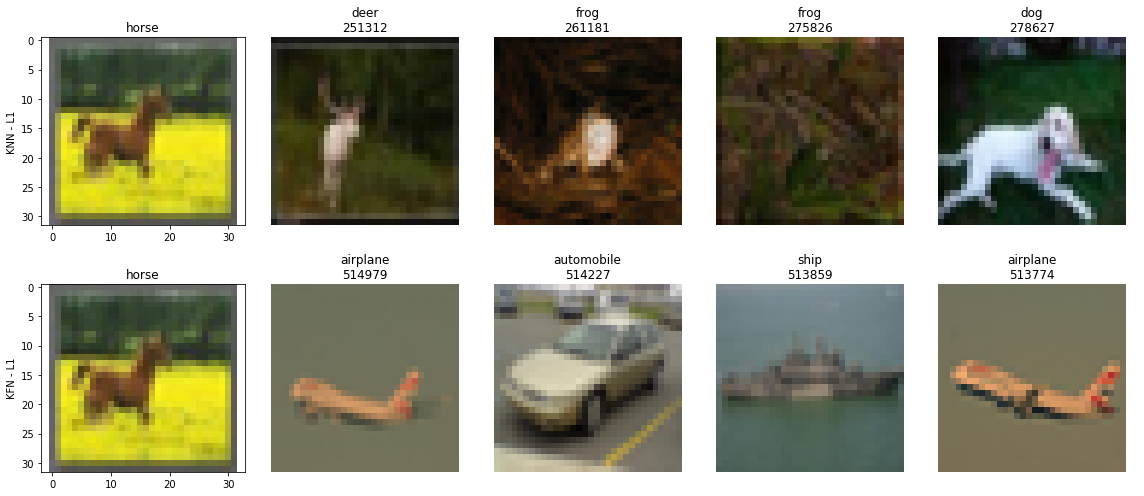

In [4]:
fig, axes = plt.subplots(2, 5, figsize = (16, 7), sharey = True)

L1_kNN = np.flip(L1_Cifar10.argsort()[:9][::-1], axis = 0)[1:]
L1_kFN = L1_Cifar10.argsort()[-8:][::-1]

axes[0][0].set_title(class10[cifar10['class'][target_idx]])
axes[0][0].imshow(target_img10.reshape(3, 32, 32).transpose(1, 2, 0))
axes[0][0].set_ylabel('KNN - L1')
axes[1][0].set_title(class10[cifar10['class'][target_idx]])
axes[1][0].imshow(target_img10.reshape(3, 32, 32).transpose(1, 2, 0))
axes[1][0].set_ylabel('KFN - L1')

for i in range(1, 5):
    
    axes[0][i].set_title(class10[cifar10['class'][L1_kNN[i - 1]]] + '\n' + str(int(L1_Cifar10[L1_kNN[i - 1]])))
    axes[1][i].set_title(class10[cifar10['class'][L1_kFN[i - 1]]] + '\n' + str(int(L1_Cifar10[L1_kFN[i - 1]])))
    axes[0][i].imshow(cifar10['img'][L1_kNN[i - 1]].reshape(3, 32, 32).transpose(1, 2, 0))
    axes[1][i].imshow(cifar10['img'][L1_kFN[i - 1]].reshape(3, 32, 32).transpose(1, 2, 0))
    axes[0][i].axis('off')
    axes[1][i].axis('off')

plt.tight_layout()
plt.show()

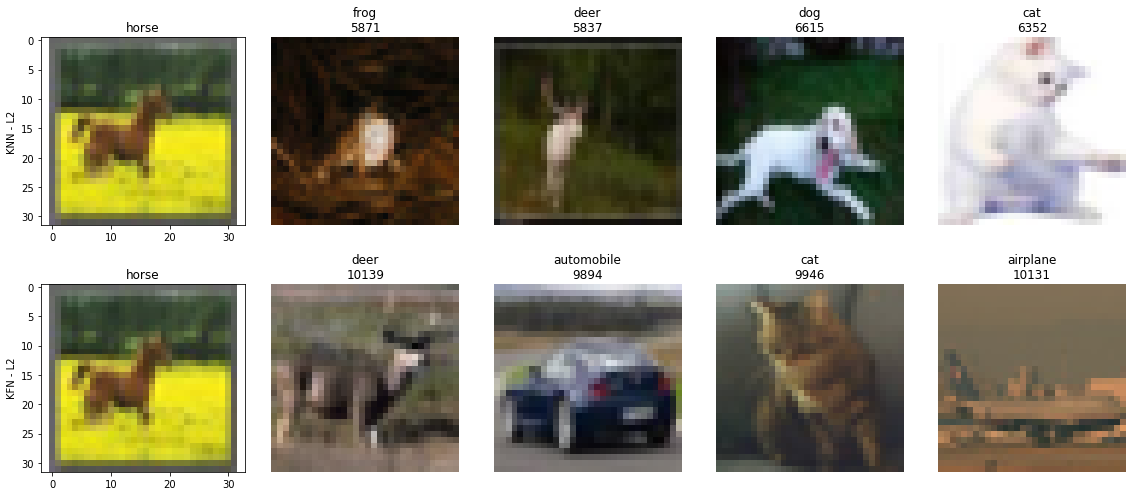

In [5]:
fig, axes = plt.subplots(2, 5, figsize = (16, 7), sharey = True)

L2_kNN = np.flip(L2_Cifar10.argsort()[:5][::-1], axis = 0)[1:]
L2_kFN = L2_Cifar10.argsort()[-4:][::-1]

axes[0][0].set_title(class10[cifar10['class'][target_idx]])
axes[0][0].imshow(target_img10.reshape(3, 32, 32).transpose(1, 2, 0))
axes[0][0].set_ylabel('KNN - L2')
axes[1][0].set_title(class10[cifar10['class'][target_idx]])
axes[1][0].imshow(target_img10.reshape(3, 32, 32).transpose(1, 2, 0))
axes[1][0].set_ylabel('KFN - L2')

for i in range(1, 5):
    
    axes[0][i].set_title(class10[cifar10['class'][L2_kNN[i - 1]]] + '\n' + str(int(L2_Cifar10[L1_kNN[i - 1]])))
    axes[1][i].set_title(class10[cifar10['class'][L2_kFN[i - 1]]] + '\n' + str(int(L2_Cifar10[L1_kFN[i - 1]])))
    axes[0][i].imshow(cifar10['img'][L2_kNN[i - 1]].reshape(3, 32, 32).transpose(1, 2, 0))
    axes[1][i].imshow(cifar10['img'][L2_kFN[i - 1]].reshape(3, 32, 32).transpose(1, 2, 0))
    axes[0][i].axis('off')
    axes[1][i].axis('off')

plt.tight_layout()
plt.show()

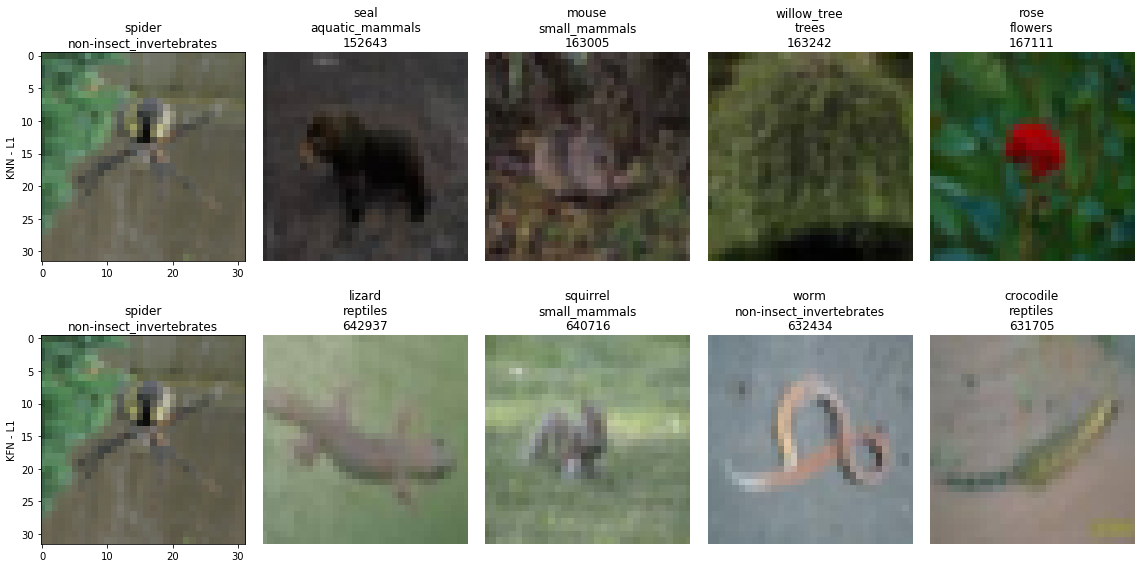

In [6]:
fig, axes = plt.subplots(2, 5, figsize = (16, 8), sharey = True)

L1_kNN = np.flip(L1_Cifar100.argsort()[:5][::-1], axis = 0)[1:]
L1_kFN = L1_Cifar100.argsort()[-4:][::-1]

axes[0][0].set_title(class100[cifar100['class'][target_idx]] + '\n' + super_class100[cifar100['super_class'][target_idx]])
axes[0][0].imshow(target_img100.reshape(3, 32, 32).transpose(1, 2, 0))
axes[0][0].set_ylabel('KNN - L1')
axes[1][0].set_title(class100[cifar100['class'][target_idx]] + '\n' + super_class100[cifar100['super_class'][target_idx]])
axes[1][0].imshow(target_img100.reshape(3, 32, 32).transpose(1, 2, 0))
axes[1][0].set_ylabel('KFN - L1')

for i in range(1, 5):
    
    axes[0][i].set_title(class100[cifar100['class'][L1_kNN[i - 1]]] + '\n' +
                         super_class100[cifar100['super_class'][L1_kNN[i - 1]]] + '\n' + str(int(L1_Cifar100[L1_kNN[i - 1]])))
    axes[1][i].set_title(class100[cifar100['class'][L1_kFN[i - 1]]] + '\n' +
                         super_class100[cifar100['super_class'][L1_kFN[i - 1]]] + '\n' + str(int(L1_Cifar100[L1_kFN[i - 1]])))
    axes[0][i].imshow(cifar100['img'][L1_kNN[i - 1]].reshape(3, 32, 32).transpose(1, 2, 0))
    axes[1][i].imshow(cifar100['img'][L1_kFN[i - 1]].reshape(3, 32, 32).transpose(1, 2, 0))
    axes[0][i].axis('off')
    axes[1][i].axis('off')
    
plt.tight_layout()
plt.show()

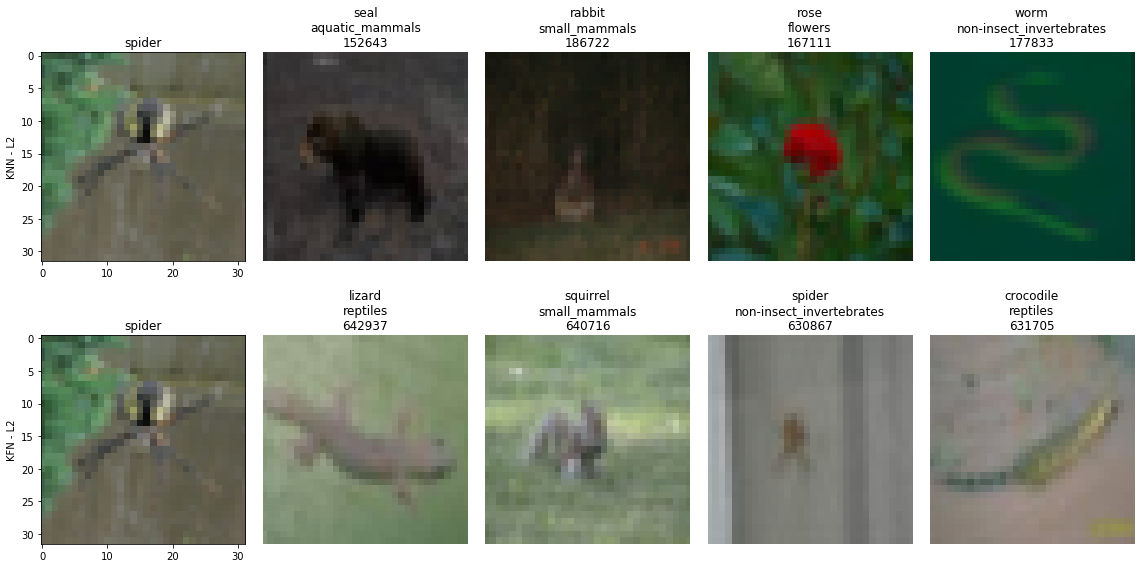

In [7]:
fig, axes = plt.subplots(2, 5, figsize = (16, 8), sharey = True)

L2_kNN = np.flip(L2_Cifar100.argsort()[:5][::-1], axis = 0)[1:]
L2_kFN = L2_Cifar100.argsort()[-4:][::-1]

axes[0][0].set_title(class100[cifar100['class'][target_idx]])
axes[0][0].imshow(target_img100.reshape(3, 32, 32).transpose(1, 2, 0))
axes[0][0].set_ylabel('KNN - L2')
axes[1][0].set_title(class100[cifar100['class'][target_idx]])
axes[1][0].imshow(target_img100.reshape(3, 32, 32).transpose(1, 2, 0))
axes[1][0].set_ylabel('KFN - L2')

for i in range(1, 5):
    
    axes[0][i].set_title(class100[cifar100['class'][L2_kNN[i - 1]]] + '\n' +
                         super_class100[cifar100['super_class'][L2_kNN[i - 1]]] + '\n' + str(int(L1_Cifar100[L2_kNN[i - 1]])))
    axes[1][i].set_title(class100[cifar100['class'][L2_kFN[i - 1]]] + '\n' +
                         super_class100[cifar100['super_class'][L2_kFN[i - 1]]] + '\n' + str(int(L1_Cifar100[L2_kFN[i - 1]])))
    axes[0][i].imshow(cifar100['img'][L2_kNN[i - 1]].reshape(3, 32, 32).transpose(1, 2, 0))
    axes[1][i].imshow(cifar100['img'][L2_kFN[i - 1]].reshape(3, 32, 32).transpose(1, 2, 0))
    axes[0][i].axis('off')
    axes[1][i].axis('off')

plt.tight_layout()
plt.show()